## Importing Necessary Libraries


In [12]:
import numpy as np
import pandas as pd
import src.model as src
import importlib
importlib.reload(src)
from keras.callbacks import EarlyStopping
from keras.utils import plot_model


## Reading All The Data


In [2]:
X_train = pd.read_csv("../../data/divided_data/X_train.csv")
y_train = pd.read_csv("../../data/divided_data/y_train.csv")

In [3]:
print(X_train)

                                                  vector1  \
0       [ 0.5295678  -0.15853217 -0.22870015 -0.058609...   
1       [ 0.63753766 -0.22587937 -0.14917918  0.058745...   
2       [ 0.54976434 -0.03897028 -0.17230012 -0.044592...   
3       [ 0.56717443 -0.10753902 -0.12188084 -0.094741...   
4       [ 0.5637538  -0.20517558 -0.1467287  -0.028035...   
...                                                   ...   
296310  [ 0.5889391  -0.17724791 -0.16049017  0.073490...   
296311  [ 0.47761875 -0.05568955 -0.1513559  -0.143570...   
296312  [ 4.9444079e-01 -1.8513876e-01 -9.1559693e-02 ...   
296313  [ 4.9490848e-01 -2.4393159e-01 -1.7211759e-01 ...   
296314  [ 0.71045923 -0.18323508 -0.098042    0.030679...   

                                                  vector2  
0       [ 0.6130774  -0.14473288 -0.17602023  0.011747...  
1       [ 0.63753766 -0.22587937 -0.14917918  0.058745...  
2       [ 0.60705286 -0.1455763  -0.19481653  0.007876...  
3       [ 0.6309981  -0.214

#### Training the model

In [4]:
X_train_q1 = [np.array(xi.replace('\n', '').strip()[1:-1].split(), dtype=np.float32) for xi in X_train["vector1"]]
X_train_q2 = [np.array(xi.replace('\n', '').strip()[1:-1].split(), dtype=np.float32) for xi in X_train["vector2"]]

X_train_q1 = np.array(X_train_q1)  # questions 1 in the training set
X_train_q2 = np.array(X_train_q2)  # questions 2 in the training set

In [5]:
# Define the hyperparameters
input_length = 25
batch_size = 32
epochs = 10

In [6]:
# Create the model
model = src.create_model(input_length)


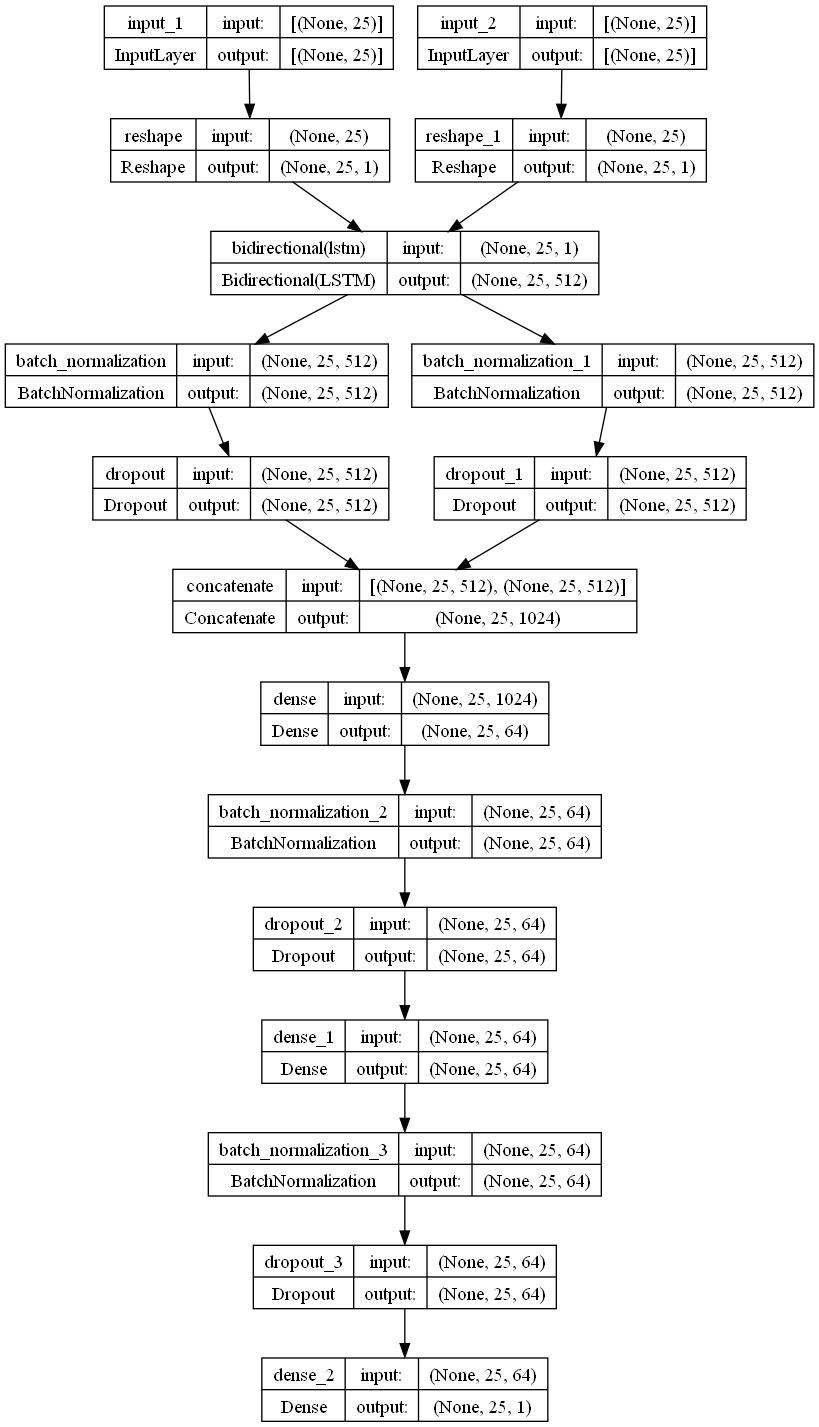

In [13]:
# Generate a graph representation of the model
plot_model(model, to_file='../../reports/model_graph.png', show_shapes=True)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 reshape (Reshape)              (None, 25, 1)        0           ['input_1[0][0]']                
                                                                                                  
 reshape_1 (Reshape)            (None, 25, 1)        0           ['input_2[0][0]']                
                                                                                              

In [7]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit([X_train_q1,X_train_q2], y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
8334/8334 [==============================] - 2257s 270ms/step - loss: 0.6553 - accuracy: 0.6217 - val_loss: 0.6343 - val_accuracy: 0.6399
Epoch 2/10
8334/8334 [==============================] - 2264s 272ms/step - loss: 0.6376 - accuracy: 0.6336 - val_loss: 0.6217 - val_accuracy: 0.6553
Epoch 3/10
8334/8334 [==============================] - 2030s 244ms/step - loss: 0.6239 - accuracy: 0.6480 - val_loss: 0.6418 - val_accuracy: 0.6248
Epoch 4/10
8334/8334 [==============================] - 3366s 404ms/step - loss: 0.6167 - accuracy: 0.6556 - val_loss: 0.6043 - val_accuracy: 0.6726
Epoch 5/10
8334/8334 [==============================] - 2818s 338ms/step - loss: 0.6119 - accuracy: 0.6605 - val_loss: 0.6033 - val_accuracy: 0.6750
Epoch 6/10
8334/8334 [==============================] - 2031s 244ms/step - loss: 0.6086 - accuracy: 0.6640 - val_loss: 0.6039 - val_accuracy: 0.6709
Epoch 7/10
8334/8334 [==============================] - 2701s 324ms/step - loss: 0.6058 - accuracy: 0.6670

In [8]:
model.save('../../models/v9')

INFO:tensorflow:Assets written to: ../../models/v9\assets
